In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import defaultdict
import numpy as np
from tqdm import tqdm
import os

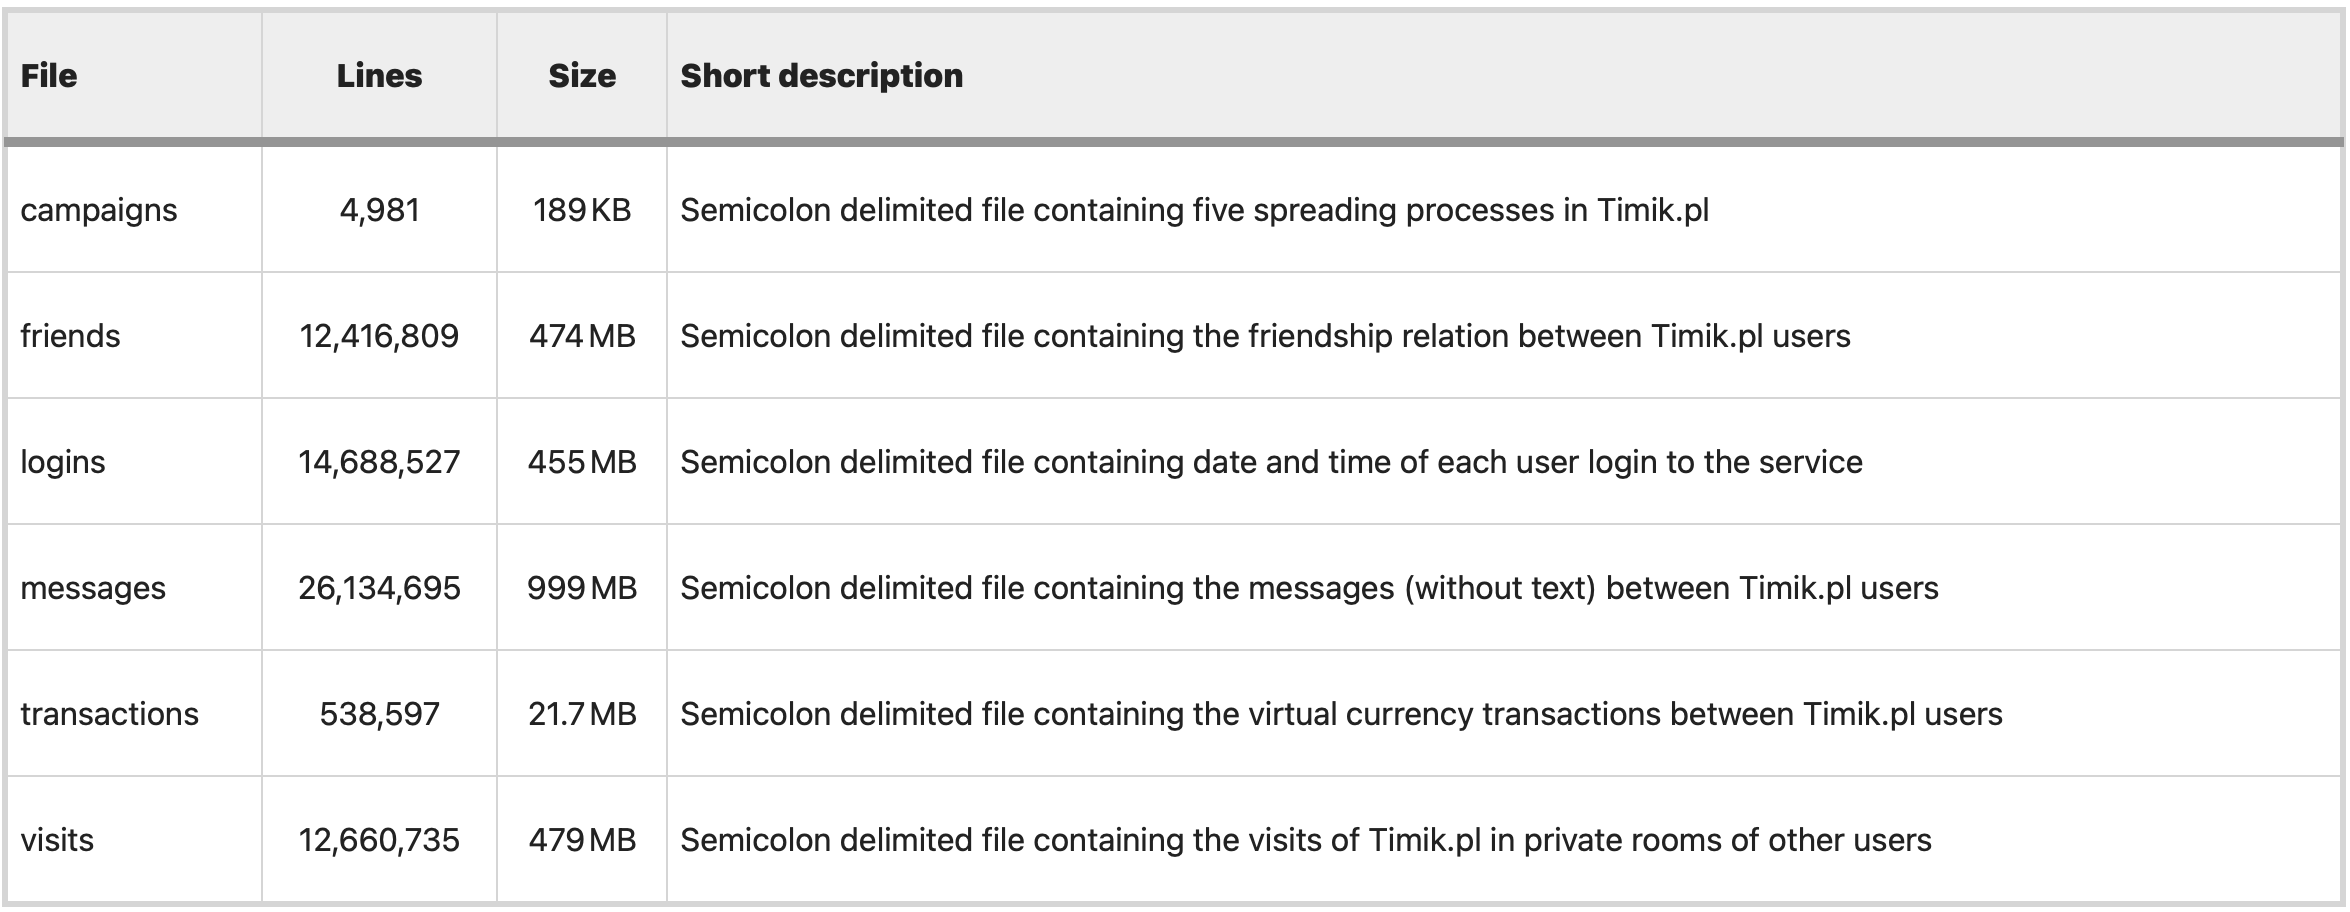

In [2]:
from IPython.display import Image, display

# show table
display(Image(filename='table1.png'))

# Load CSV file

In [3]:
campaigns = pd.read_csv('data/campaigns.csv', sep=';', header=None)
campaigns.columns = ['campaign_id', 'timestamp', 'sender_id', 'receiver_id']
campaigns.head()

campaign_id            timestamp  sender_id  receiver_id
0            1  2010-10-31 15:04:00      16453        16454
1            1  2010-10-31 15:04:00      16453        16455
2            1  2010-10-31 15:04:00      16453        16456
3            1  2010-10-31 15:04:00      16453        16457
4            1  2010-10-31 15:04:00      16453        16458

In [4]:
friends = pd.read_csv('data/friends.csv', sep=';', header=None)
friends.columns = ['timestamp', 'sender_id', 'receiver_id']
friends.head()

timestamp  sender_id  receiver_id
0  2007-12-15 12:33:33     100002        99803
1  2007-12-15 12:33:33     100006        99186
2  2007-12-15 12:33:33     100017        99480
3  2007-12-15 12:33:33     100024       100760
4  2007-12-15 12:33:33     100024       100871

In [5]:
logins = pd.read_csv('data/logins.csv', sep=';', header=None)
logins.columns = ['timestamp', 'user_id']
logins.head()

timestamp  user_id
0  2007-11-26 09:40:00    66034
1  2007-11-26 09:40:11    81312
2  2007-11-26 09:40:34    81371
3  2007-11-26 09:40:47    41701
4  2007-11-26 09:40:59    76208

In [6]:
messages = pd.read_csv('data/messages.csv', sep=';', header=None)
messages.columns = ['timestamp', 'sender_id', 'receiver_id']
messages.head()

timestamp  sender_id  receiver_id
0  2007-11-08 16:39:30      16485        16507
1  2007-11-08 16:43:52      16507        16485
2  2007-11-08 16:45:22      16507        16485
3  2007-11-09 22:44:19      16637        16639
4  2007-11-09 23:23:01      16637        16643

In [7]:
transactions = pd.read_csv('data/transactions.csv', sep=';', header=None)
transactions.columns = ['timestamp', 'sender_id', 'receiver_id', 'amount']
transactions.head()

timestamp  sender_id  receiver_id  amount
0  2007-10-28 14:53:04      16485        16486      44
1  2007-10-28 15:04:00      16485        16486      50
2  2007-10-28 15:04:41      16485        16486      25
3  2007-10-28 15:06:05      16485        16486     100
4  2007-10-28 15:08:37      16486        16485      33

In [8]:
visits = pd.read_csv('data/visits.csv', sep=';', header=None)
visits.columns = ['timestamp', 'sender_id', 'receiver_id']
visits.head()

timestamp  sender_id  receiver_id
0  2008-01-07 22:07:00     112031      2066845
1  2008-01-07 22:08:00     123403       180479
2  2008-01-07 22:08:00      16454       181046
3  2008-01-07 22:08:00      16870       180479
4  2008-01-07 22:08:00      17502       180479

In [9]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   campaign_id  4981 non-null   int64 
 1   timestamp    4981 non-null   object
 2   sender_id    4981 non-null   int64 
 3   receiver_id  4981 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 155.8+ KB


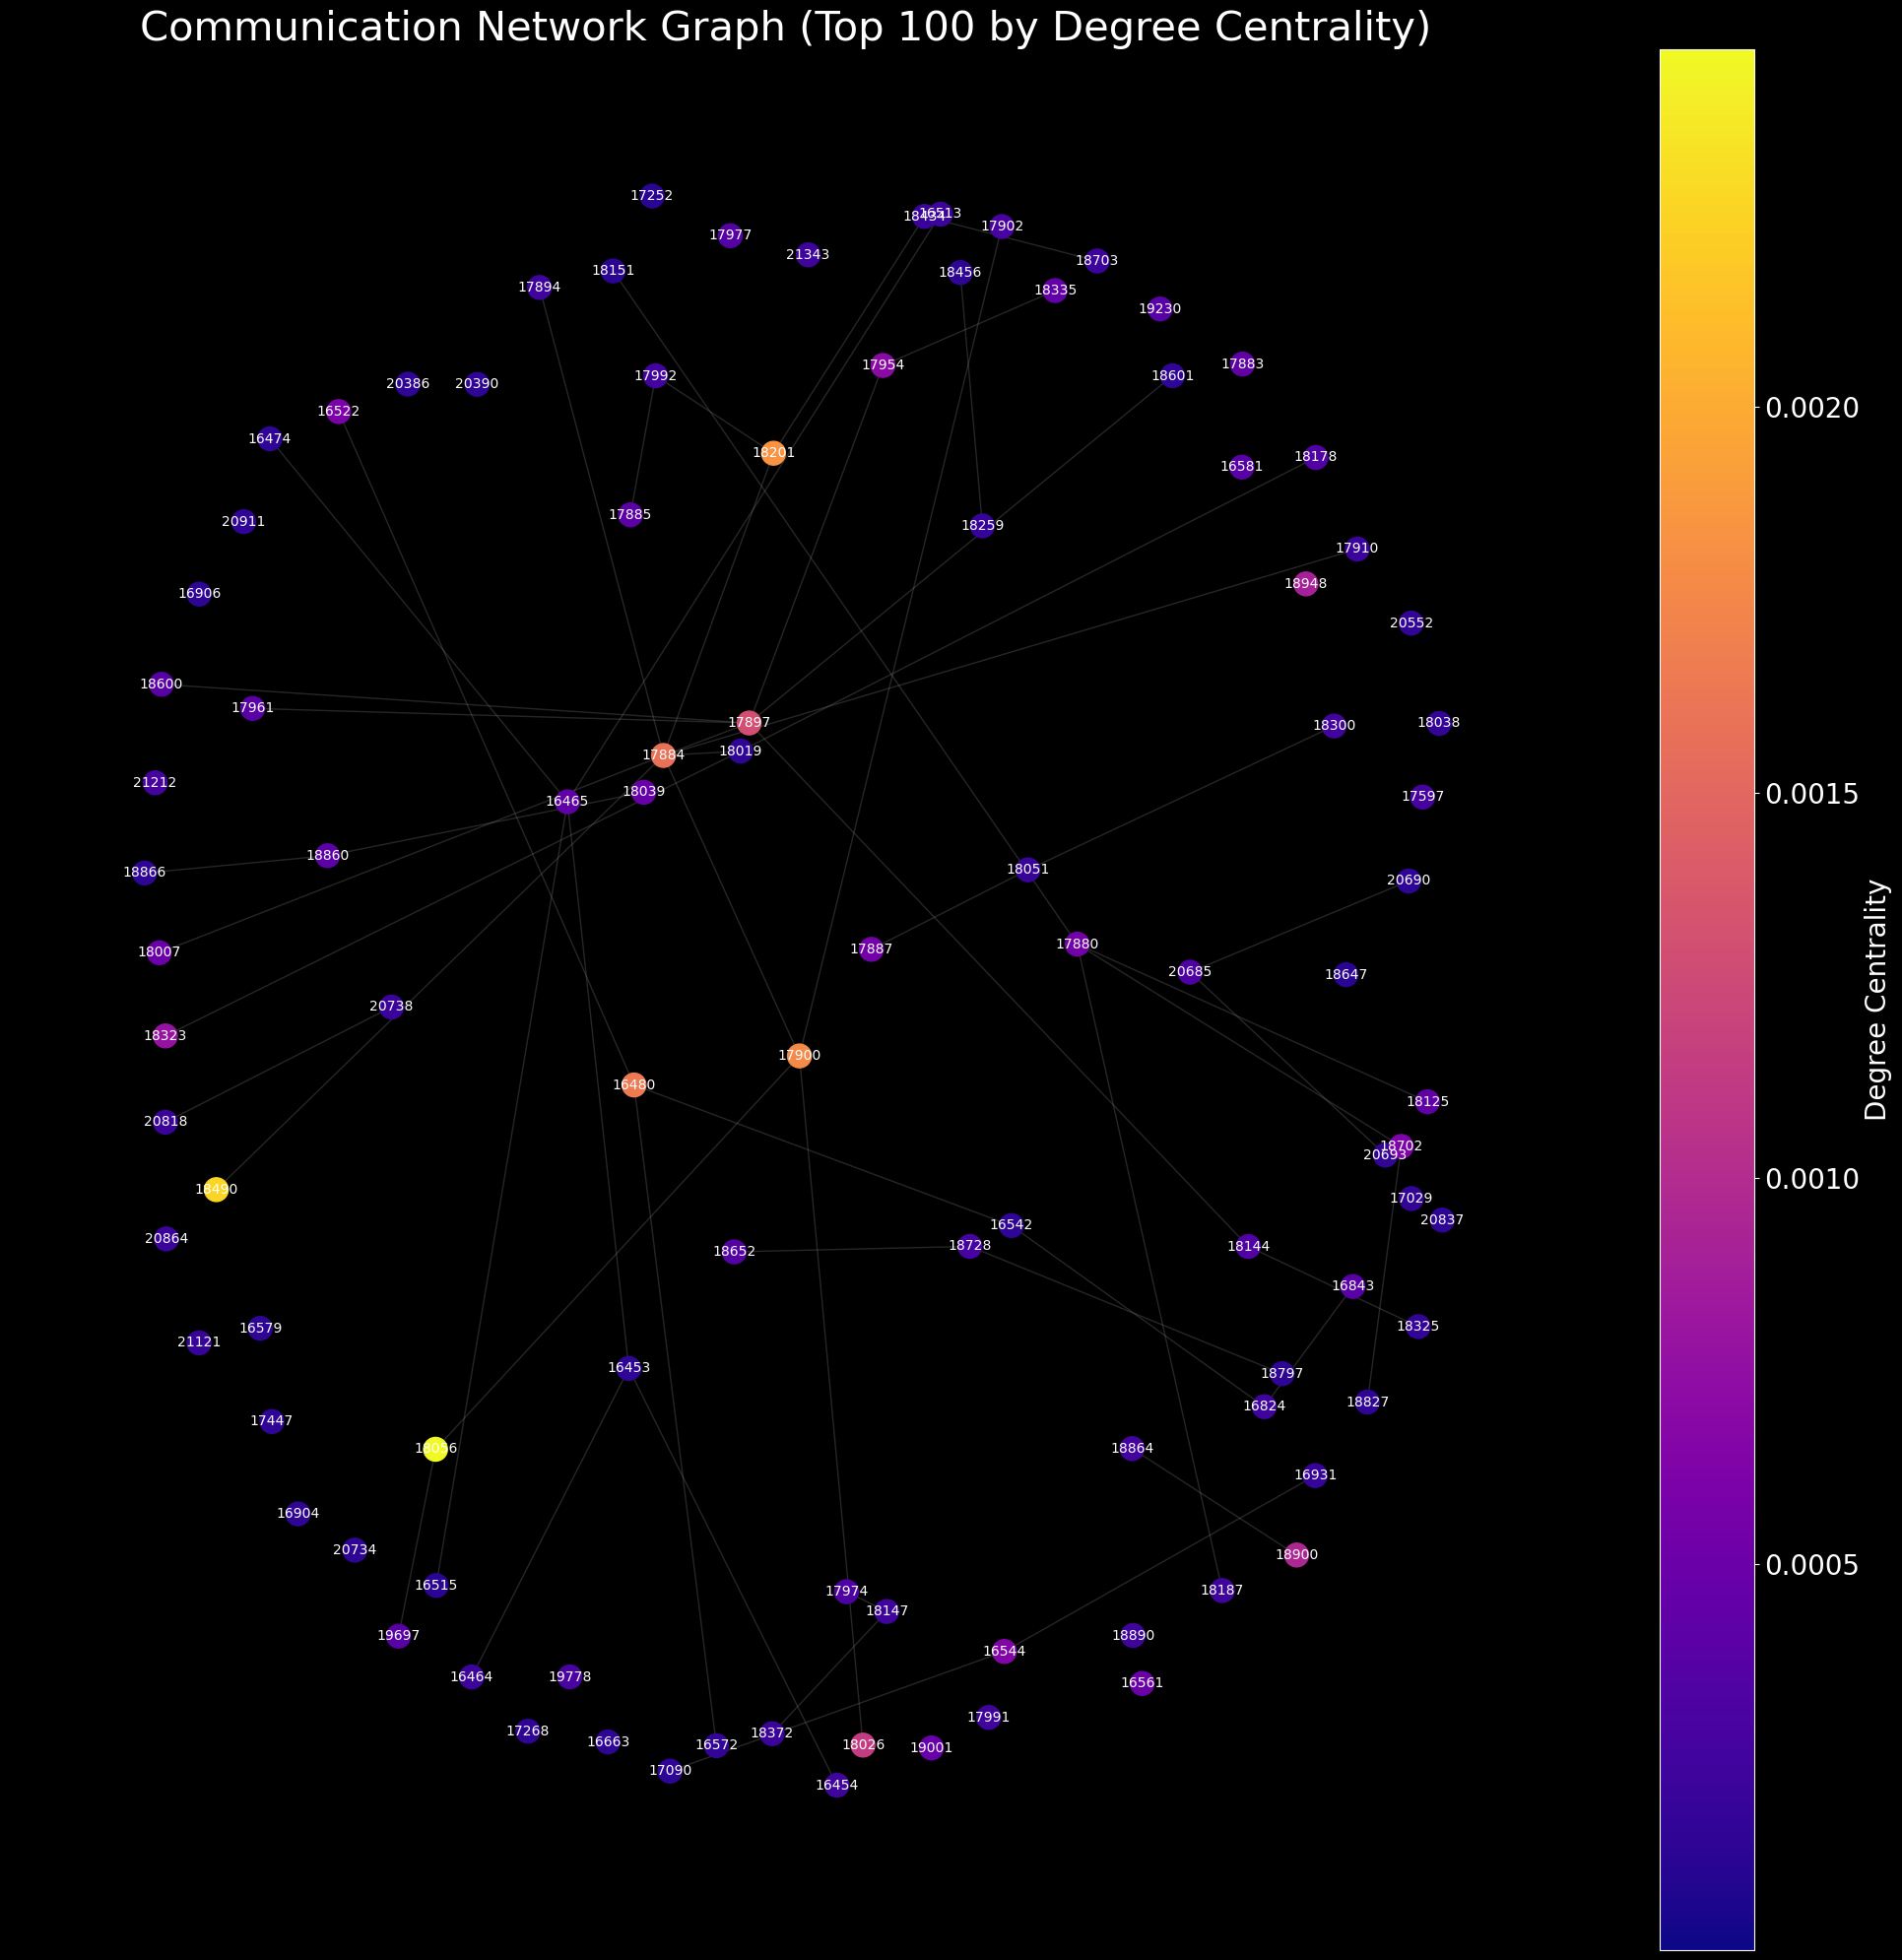

In [10]:
plt.style.use('dark_background')

G = nx.DiGraph()
edges = list(zip(campaigns['sender_id'], campaigns['receiver_id']))
G.add_edges_from(edges)

sub_nodes = set(campaigns['sender_id']).union(campaigns['receiver_id'])
subG_full = G.subgraph(sub_nodes)

degree_centrality = nx.degree_centrality(subG_full)

# top 100
top_100_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:100]
subG = G.subgraph(top_100_nodes)

node_sizes = [300 + 2000 * (degree_centrality[n]**2) for n in subG.nodes()]
node_colors = [degree_centrality[n]**1.5 for n in subG.nodes()]


plt.figure(figsize=(20, 20))
pos = nx.spring_layout(subG, k=0.3, seed=42)

nodes = nx.draw_networkx_nodes(
    subG, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    alpha=1,
    vmin=0.000000001,
    vmax=max(node_colors)
)

nx.draw_networkx_edges(subG, pos, edge_color='gray', alpha=0.3, arrows=False)

labels = {node: str(node) for node in subG.nodes()}
nx.draw_networkx_labels(subG, pos, labels, font_size=10, font_color='white')

cbar = plt.colorbar(nodes)
cbar.set_label("Degree Centrality", fontsize=20, color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), fontsize=20, color='white')

plt.title("Communication Network Graph (Top 100 by Degree Centrality)", fontsize=30, color='white')
plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
top_100_data = [(node, degree_centrality[node]) for node in top_100_nodes]
df_top_100 = pd.DataFrame(top_100_data, columns=["user_id", "degree_centrality"])

os.makedirs("./table", exist_ok=True)
df_top_100.to_csv("table/top100_single_degree.csv", index=False)

# Degree centrality of a single-layer network

# Degree centrality of a multi-layer network

### Degree Centrality in a Single-Layer Network

For a graph $$( G = (V, E) )$$ the normalized degree centrality of a node $$( v\ in\ V )$$ is defined as:
$$
C_D^{(G)}(v) = \frac{\deg(v)}{n - 1}
$$

### Degree Centrality in Multilayer Networks

In multilayer networks, **Degree Centrality** reflects how well-connected a node is **across multiple types of relationships or interaction layers**.

### Multilayer Degree Centrality Definition

The multilayer degree centrality for a node $$(v\ in\ V)$$ is computed by aggregating its centralities from each layer:

$$
C_D^{(\mathcal{M})}(v) = \sum_{\ell = 1}^{L} w^{[\ell]} \cdot C_D^{(G^{[\ell]})}(v)
$$


### Example:

Assuming six layers: campaigns, friends, messages, transactions, visits, and logins:

$$
C_D^{\text{multi}}(v) = C_D^{\text{campaign}}(v) + C_D^{\text{friend}}(v) + C_D^{\text{message}}(v) + C_D^{\text{transaction}}(v) + C_D^{\text{visit}}(v) + C_D^{\text{login}}(v)
$$

In [12]:
layers = {}

# campaigns
G1 = nx.DiGraph()
G1.add_edges_from(zip(campaigns['sender_id'], campaigns['receiver_id']))
layers['campaign'] = nx.degree_centrality(G1)

# friends
G2 = nx.Graph()
G2.add_edges_from(zip(friends['sender_id'], friends['receiver_id']))
layers['friend'] = nx.degree_centrality(G2)

# messages
G3 = nx.DiGraph()
G3.add_edges_from(zip(messages['sender_id'], messages['receiver_id']))
layers['message'] = nx.degree_centrality(G3)

# transactions
G4 = nx.DiGraph()
G4.add_edges_from(zip(transactions['sender_id'], transactions['receiver_id']))
layers['transaction'] = nx.degree_centrality(G4)

# visits
G5 = nx.DiGraph()
G5.add_edges_from(zip(visits['sender_id'], visits['receiver_id']))
layers['visit'] = nx.degree_centrality(G5)

In [13]:
# multiple levels of degree centrality
combined_degree = defaultdict(float)

for layer_name, centrality in layers.items():
    for node, score in centrality.items():
        combined_degree[node] += score

# top 100
top_nodes = sorted(combined_degree.items(), key=lambda x: x[1], reverse=True)[:100]
for user_id, score in top_nodes:
    print(f"User {user_id} → Multilayer Degree Centrality: {score:.4f}")

User 499756 → Multilayer Degree Centrality: 0.1819
User 16453 → Multilayer Degree Centrality: 0.1741
User 124836 → Multilayer Degree Centrality: 0.1486
User 268072 → Multilayer Degree Centrality: 0.1176
User 794230 → Multilayer Degree Centrality: 0.1139
User 16787 → Multilayer Degree Centrality: 0.1001
User 100248 → Multilayer Degree Centrality: 0.0963
User 502887 → Multilayer Degree Centrality: 0.0891
User 16454 → Multilayer Degree Centrality: 0.0790
User 614020 → Multilayer Degree Centrality: 0.0790
User 85724 → Multilayer Degree Centrality: 0.0780
User 371461 → Multilayer Degree Centrality: 0.0766
User 631825 → Multilayer Degree Centrality: 0.0753
User 1053396 → Multilayer Degree Centrality: 0.0714
User 1343004 → Multilayer Degree Centrality: 0.0708
User 184221 → Multilayer Degree Centrality: 0.0692
User 282277 → Multilayer Degree Centrality: 0.0630
User 355330 → Multilayer Degree Centrality: 0.0611
User 847509 → Multilayer Degree Centrality: 0.0599
User 153248 → Multilayer Degree C

In [14]:
combined_G = nx.DiGraph()
combined_G.add_edges_from(zip(campaigns['sender_id'], campaigns['receiver_id']))
combined_G.add_edges_from(zip(friends['sender_id'], friends['receiver_id']))
combined_G.add_edges_from(zip(messages['sender_id'], messages['receiver_id']))
combined_G.add_edges_from(zip(transactions['sender_id'], transactions['receiver_id']))
combined_G.add_edges_from(zip(visits['sender_id'], visits['receiver_id']))

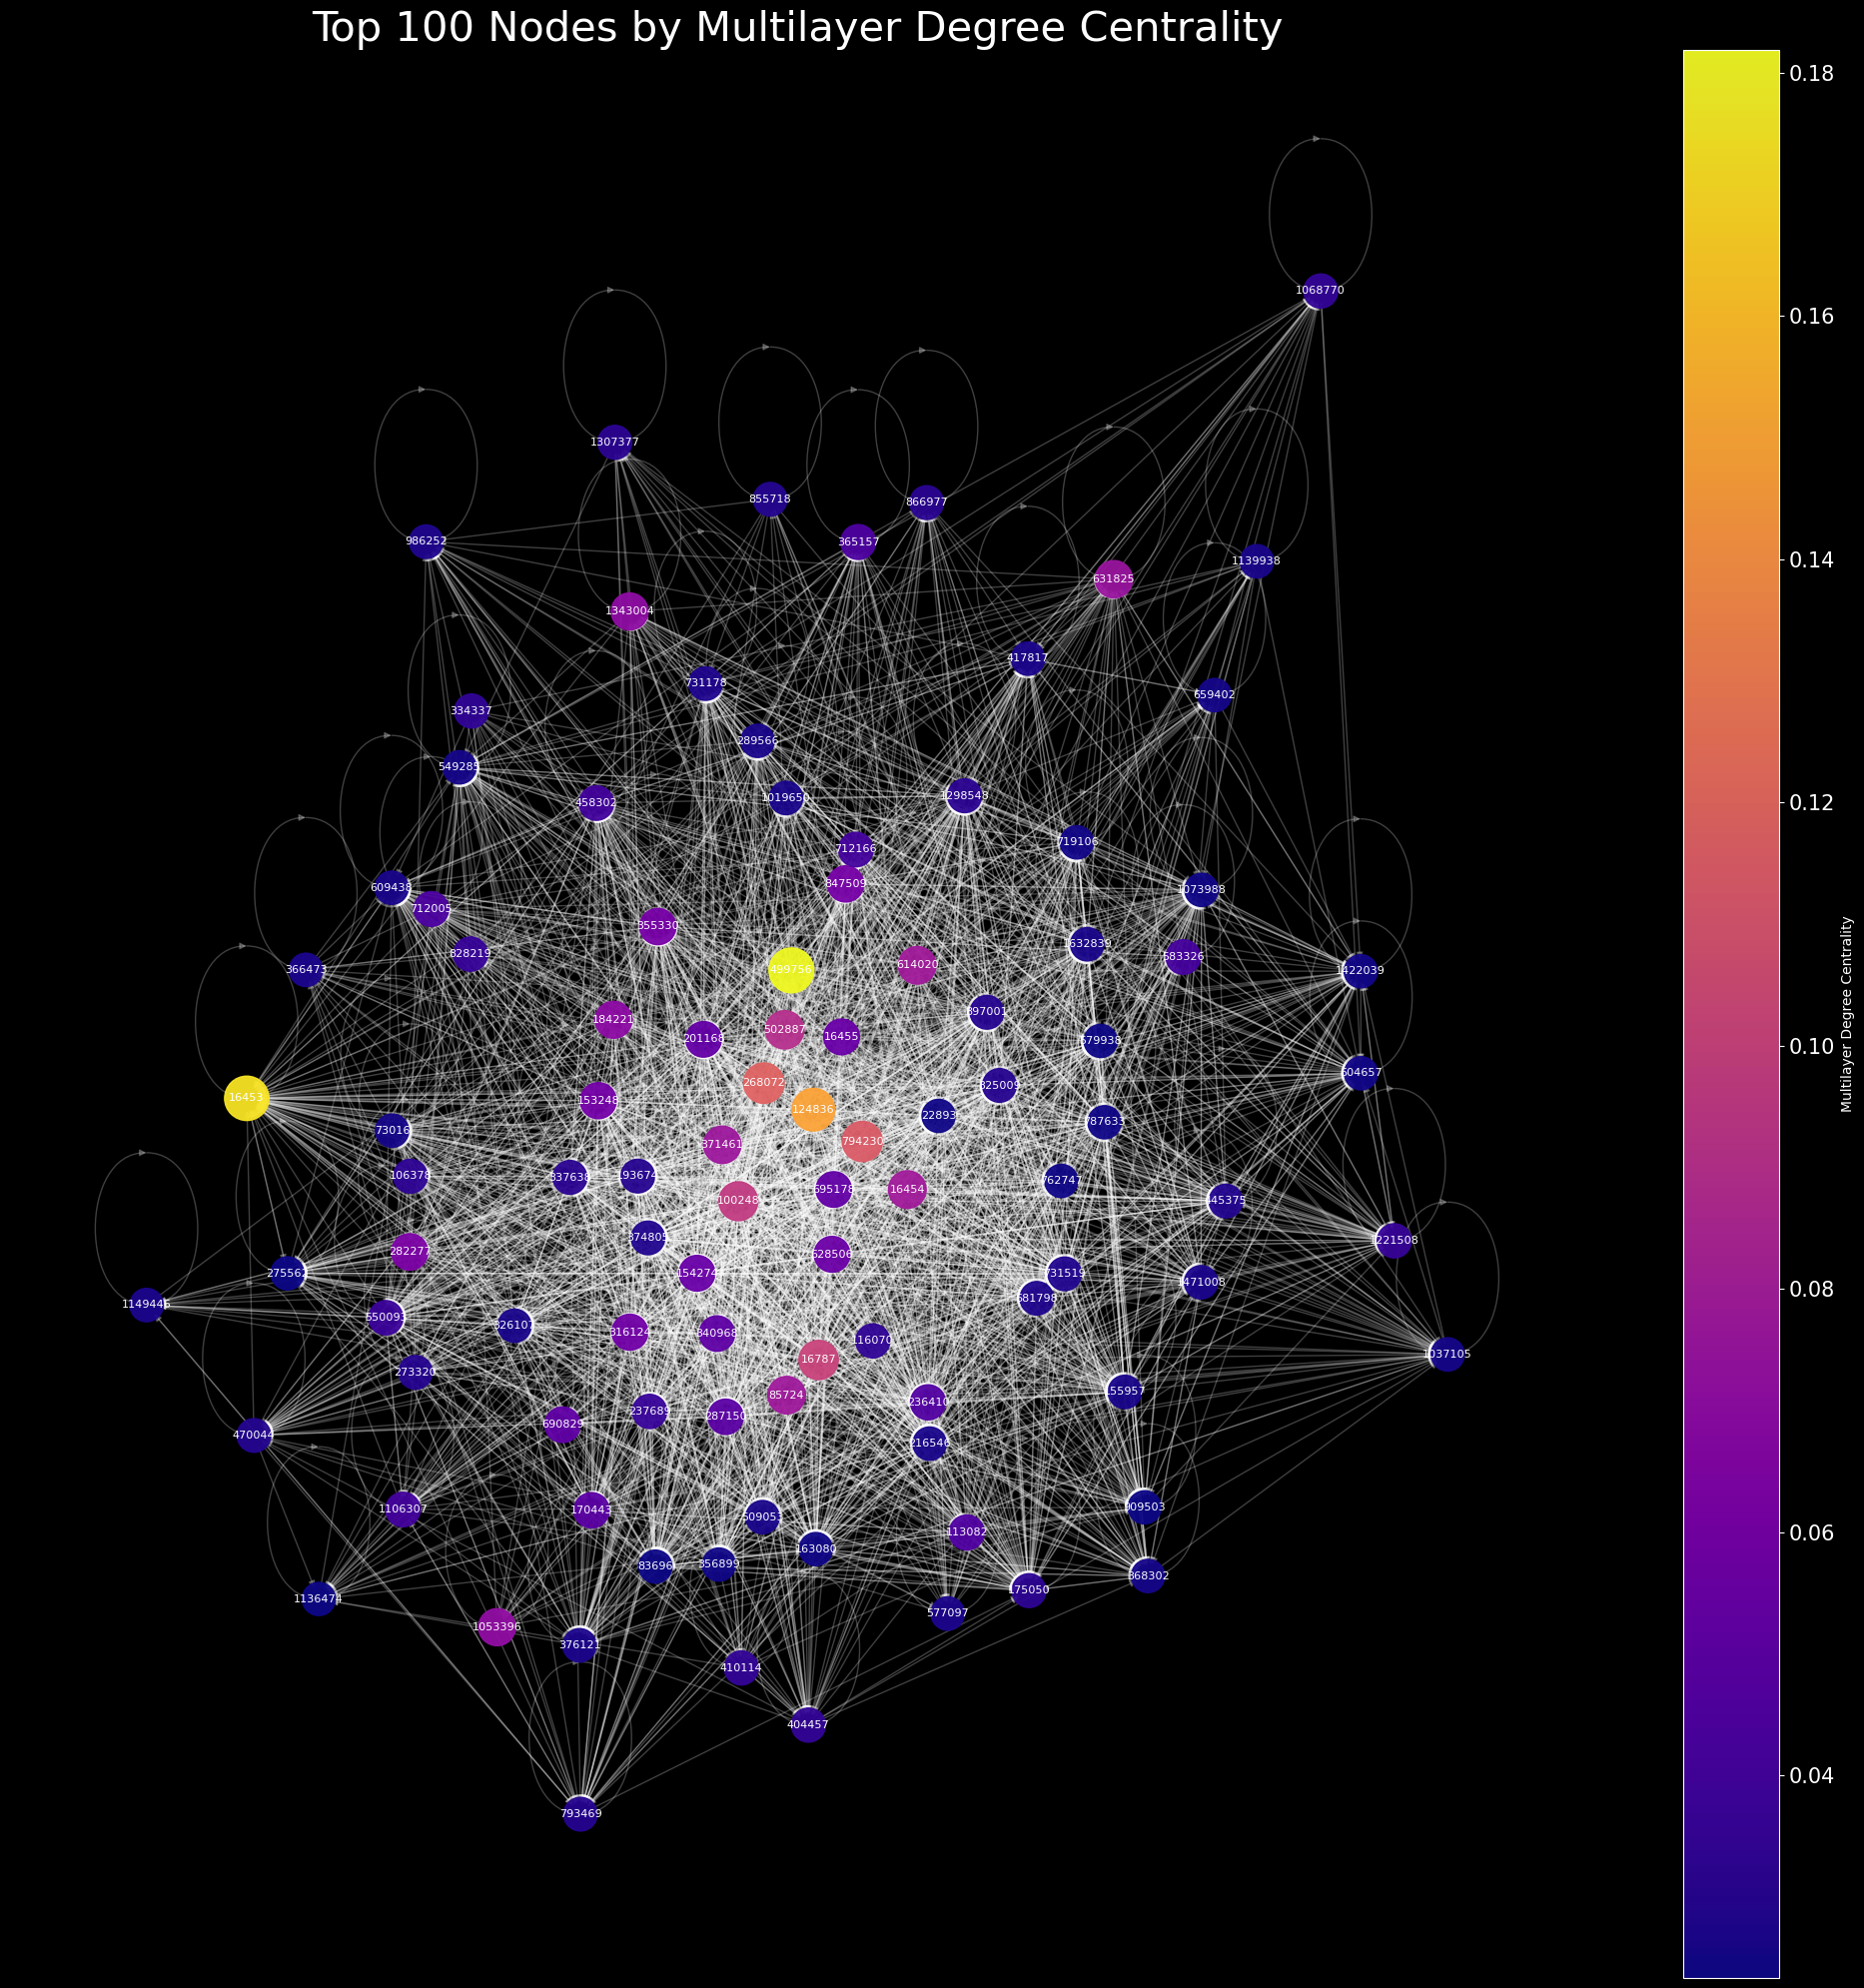

In [15]:
# top 100
top_nodes = sorted(combined_degree.items(), key=lambda x: x[1], reverse=True)[:100]
top_node_ids = [node for node, _ in top_nodes]
pd.DataFrame(top_nodes, columns=["node", "Degree Centrality"]).to_csv("table/top100_multi_degree.csv", index=False)

subG = combined_G.subgraph(top_node_ids)

node_sizes = [500 + 3000 * combined_degree.get(node, 0) for node in subG.nodes()]
node_colors = [combined_degree.get(node, 0) for node in subG.nodes()]

# plot
plt.style.use('dark_background')
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(subG, seed=42, k=0.5)

nodes = nx.draw_networkx_nodes(
    subG, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    alpha=0.95
)

nx.draw_networkx_edges(subG, pos, alpha=0.25, edge_color='white')
nx.draw_networkx_labels(subG, pos, font_size=8, font_color='white')

cbar = plt.colorbar(nodes, label="Multilayer Degree Centrality")
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(cbar.ax.yaxis.get_ticklabels(), fontsize=15, color='white')

plt.title("Top 100 Nodes by Multilayer Degree Centrality", fontsize=30, color='white')
plt.axis('off')
plt.tight_layout()
plt.show()

# Betweenness centrality of a single-layer network

In [16]:
# build
G = nx.DiGraph()
edges = list(zip(campaigns['sender_id'], campaigns['receiver_id']))
G.add_edges_from(edges)

betweenness = nx.betweenness_centrality(G)

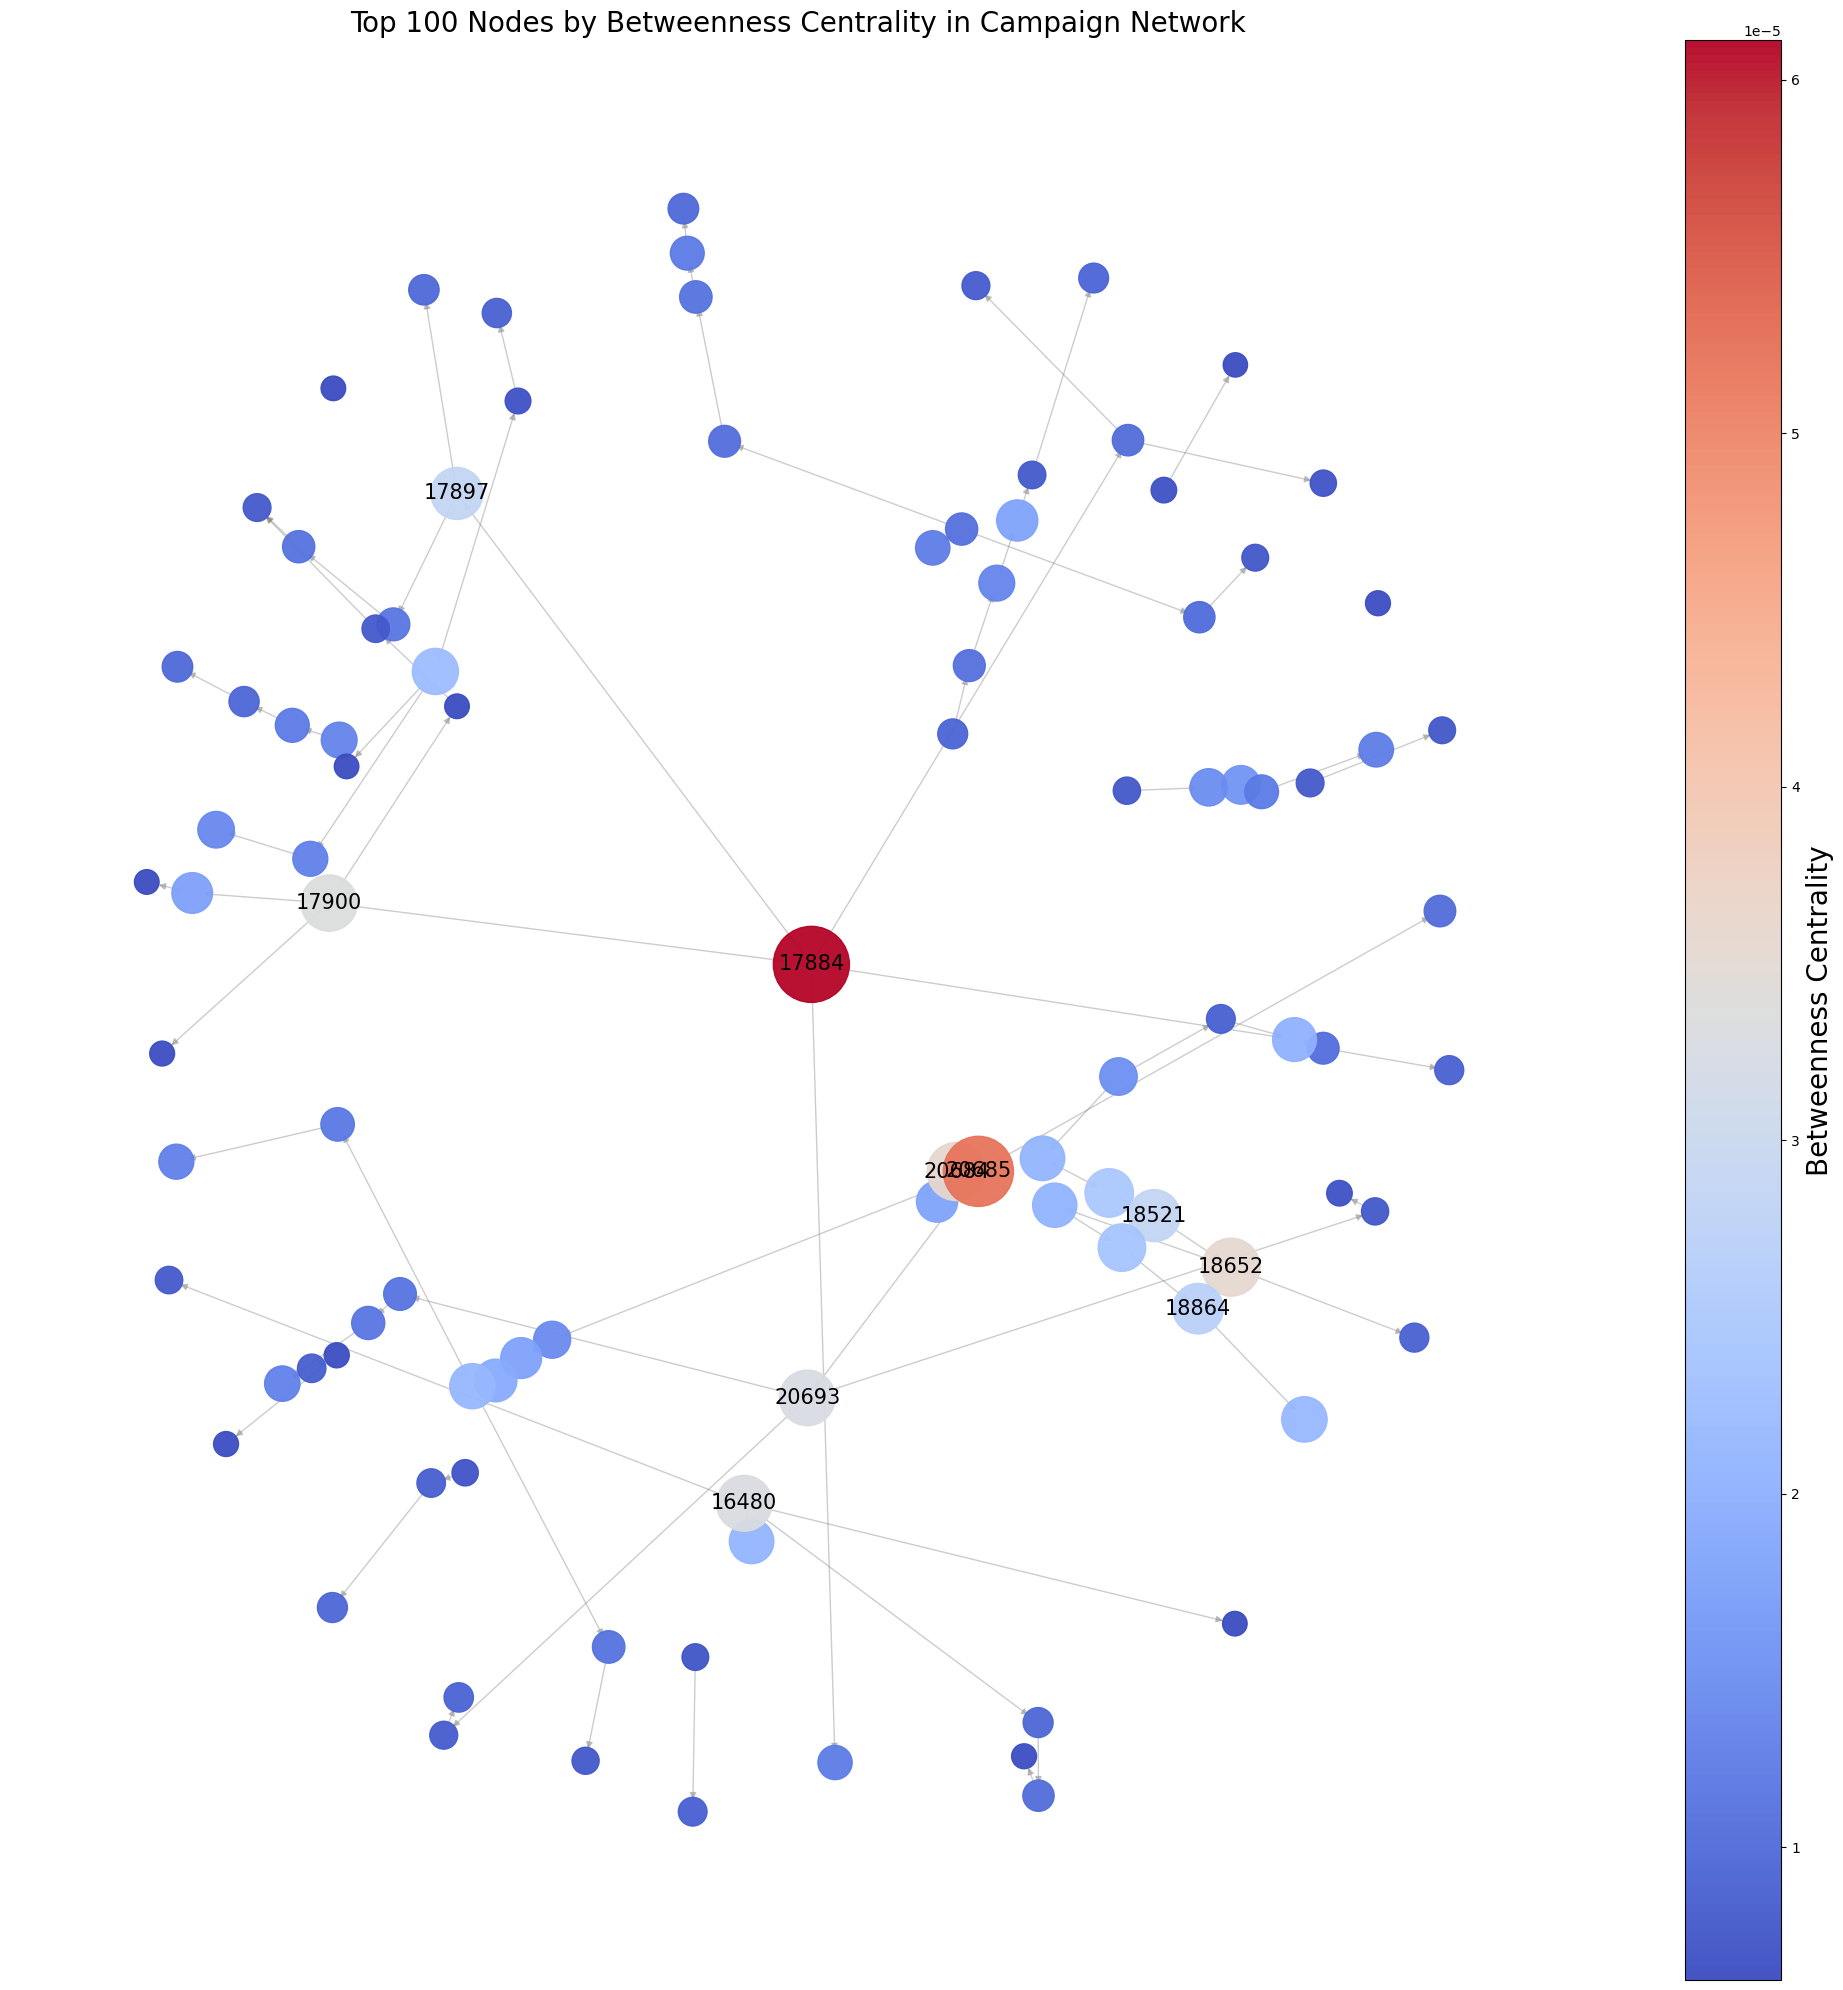

In [17]:
plt.style.use('default')
top_100 = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:100]
pd.DataFrame(top_100, columns=["node", "Betweenness Centrality"]).to_csv("table/top100_single_between.csv", index=False)
top_100_ids = [node for node, _ in top_100]

connected_top_100 = [n for n in top_100_ids if G.degree(n) > 0]
G_sub = G.subgraph(connected_top_100).copy()

node_values = np.array([betweenness.get(n, 0.0) for n in G_sub.nodes()])
node_size = 3000 * (np.log1p(node_values) / np.log1p(node_values).max())
node_color = node_values
top_10_labels = {node: str(node) for node, _ in top_100[:10]}

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G_sub, seed=42)

nodes = nx.draw_networkx_nodes(
    G_sub, pos,
    node_size=node_size,
    node_color=node_color,
    cmap=plt.cm.coolwarm,
    alpha=0.95
)

nx.draw_networkx_edges(G_sub, pos, alpha=0.4, edge_color='gray', width=1.0)

nx.draw_networkx_labels(G_sub, pos, labels=top_10_labels, font_size=15, font_color='black')

cbar = plt.colorbar(nodes)
cbar.set_label("Betweenness Centrality", fontsize=20)

plt.title("Top 100 Nodes by Betweenness Centrality in Campaign Network", fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# Multilayer Betweenness Centrality

### Single-Layer Betweenness Centrality

In a graph $$( G = (V, E) )$$ the **betweenness centrality** of a node $$( v\ in\ V )$$ is defined as:

$$
C_B(v) = \sum_{\substack{s \neq v \neq t \\ s, t \in V}} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$

### Multilayer Betweenness Centrality
The **aggregated multilayer betweenness centrality** of a node $$(\ v\ )$$ is defined as:

$$
C_B^{\text{multi}}(v) = \sum_{l=1}^{L} \alpha_l \cdot C_B^{(l)}(v)
$$

Where:
- $$( C_B^{(l)}(v) )\ is\ the\ betweenness\ centrality\ of\ node\  ( v )\ in\ layer\ ( l )$$

In [18]:
graphs = {
    'campaign': G1,
    'friend': G2,
    'message': G3,
    'transaction': G4,
    'visit': G5
}

DEGREE_THRESHOLD = 1000

layer_betweenness = {}

In [19]:
for name, g in tqdm(graphs.items(), desc="Processing layers"):
    # only keep nodes with degree greater than DEGREE_THRESHOLD
    active_nodes = [n for n, d in g.degree() if d > DEGREE_THRESHOLD]
    subgraph = g.subgraph(active_nodes).copy()

    # use sampling method
    if subgraph.number_of_nodes() > 1000:
        layer_betweenness[name] = nx.betweenness_centrality(subgraph, k=500, seed=42)
    else:
        layer_betweenness[name] = nx.betweenness_centrality(subgraph)

Processing layers: 100%|██████████████████████████| 5/5 [03:26<00:00, 41.27s/it]


In [20]:
combined_betweenness = defaultdict(float)
for centrality in layer_betweenness.values():
    for node, score in centrality.items():
        combined_betweenness[node] += score

# top 100
top_100 = sorted(combined_betweenness.items(), key=lambda x: x[1], reverse=True)[:100]

print("\nTop 100 Multilayer Betweenness Centrality Nodes:")
for node, score in top_100:
    print(f"Node {node}: {score:.6f}")


Top 100 Multilayer Betweenness Centrality Nodes:
Node 201168: 0.036430
Node 154274: 0.025267
Node 100248: 0.021381
Node 325009: 0.020071
Node 236410: 0.017952
Node 175050: 0.017428
Node 16769: 0.016761
Node 22893: 0.014571
Node 287150: 0.014521
Node 787633: 0.013521
Node 355330: 0.012014
Node 216546: 0.011858
Node 337638: 0.011517
Node 193674: 0.011103
Node 412129: 0.011030
Node 163080: 0.010553
Node 1632839: 0.010491
Node 681798: 0.010483
Node 1471008: 0.010465
Node 980724: 0.010370
Node 1221508: 0.010282
Node 476074: 0.010104
Node 481265: 0.009867
Node 958008: 0.009561
Node 374805: 0.009554
Node 744051: 0.009139
Node 509803: 0.009118
Node 155957: 0.008942
Node 695178: 0.008849
Node 731519: 0.008831
Node 327875: 0.008755
Node 1247500: 0.008701
Node 440424: 0.008295
Node 862314: 0.008253
Node 663725: 0.008232
Node 714705: 0.008152
Node 124836: 0.008030
Node 146497: 0.007961
Node 579938: 0.007769
Node 550093: 0.007663
Node 1169120: 0.007599
Node 1298548: 0.007213
Node 1073988: 0.007048

In [21]:
pd.DataFrame(top_100, columns=["node", "Betweenness Centrality"]).to_csv("table/top100_multilayer_between.csv", index=False)

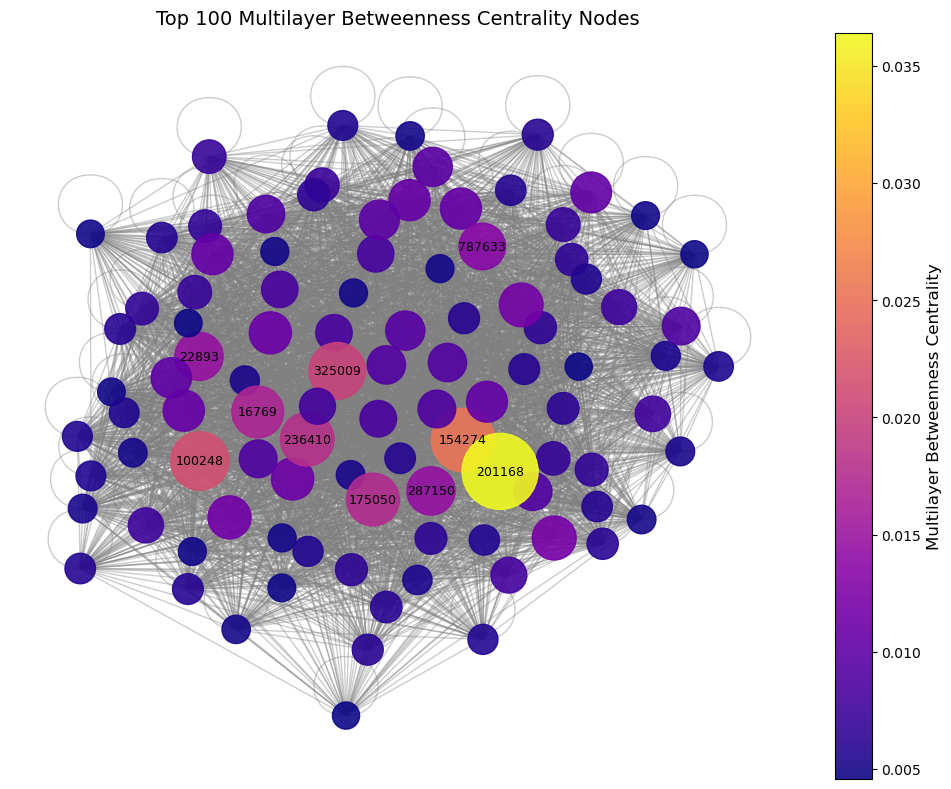

In [22]:
top_nodes = [node for node, _ in top_100]

G_combined = nx.Graph()
for g in graphs.values():
    G_combined.add_edges_from(g.edges())

G_top = G_combined.subgraph(top_nodes).copy()

node_values = np.array([combined_betweenness[n] for n in G_top.nodes()])
node_size = 3000 * (np.log1p(node_values) / np.log1p(node_values).max())
node_color = node_values

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_top, seed=42)

nodes = nx.draw_networkx_nodes(
    G_top, pos,
    node_size=node_size,
    node_color=node_color,
    cmap=plt.cm.plasma,
    alpha=0.9
)
nx.draw_networkx_edges(G_top, pos, alpha=0.4, edge_color='gray', width=1.0)

top_10_labels = {node: str(node) for node, _ in top_100[:10]}
nx.draw_networkx_labels(G_top, pos, labels=top_10_labels, font_size=9, font_color='black')

cbar = plt.colorbar(nodes)
cbar.set_label("Multilayer Betweenness Centrality", fontsize=12)

plt.title("Top 100 Multilayer Betweenness Centrality Nodes", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# Eigenvector Centrality of a single-layer network

In [23]:
G = nx.Graph()
G.add_edges_from(zip(campaigns['sender_id'], campaigns['receiver_id']))

try:
    eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    print("Eigenvector Centrality failed to converge.")
    eigen_centrality = {}

In [24]:
top_100 = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)[:100]

print("Top 100 Eigenvector Centrality Nodes:")
for node, score in top_100:
    print(f"Node {node}: {score:.6f}")

Top 100 Eigenvector Centrality Nodes:
Node 18056: 0.547783
Node 17900: 0.329483
Node 17884: 0.235514
Node 18490: 0.215023
Node 18201: 0.110789
Node 19697: 0.076078
Node 18026: 0.075994
Node 17897: 0.070664
Node 19675: 0.057300
Node 19868: 0.057294
Node 19874: 0.057294
Node 19676: 0.056687
Node 19694: 0.056687
Node 19861: 0.056687
Node 19877: 0.056687
Node 19893: 0.056687
Node 19906: 0.056687
Node 19967: 0.056687
Node 19658: 0.056092
Node 19667: 0.056092
Node 19670: 0.056092
Node 19671: 0.056092
Node 19672: 0.056092
Node 19673: 0.056092
Node 19674: 0.056092
Node 19677: 0.056092
Node 19678: 0.056092
Node 19683: 0.056092
Node 19684: 0.056092
Node 19685: 0.056092
Node 19686: 0.056092
Node 19687: 0.056092
Node 19688: 0.056092
Node 19689: 0.056092
Node 19690: 0.056092
Node 19691: 0.056092
Node 19692: 0.056092
Node 19693: 0.056092
Node 19695: 0.056092
Node 19698: 0.056092
Node 19699: 0.056092
Node 19700: 0.056092
Node 19701: 0.056092
Node 19709: 0.056092
Node 19710: 0.056092
Node 19712: 0.056

In [25]:
pd.DataFrame(top_100, columns=["node", "eigenvector_centrality"]).to_csv("table/top100_single_eigen.csv", index=False)

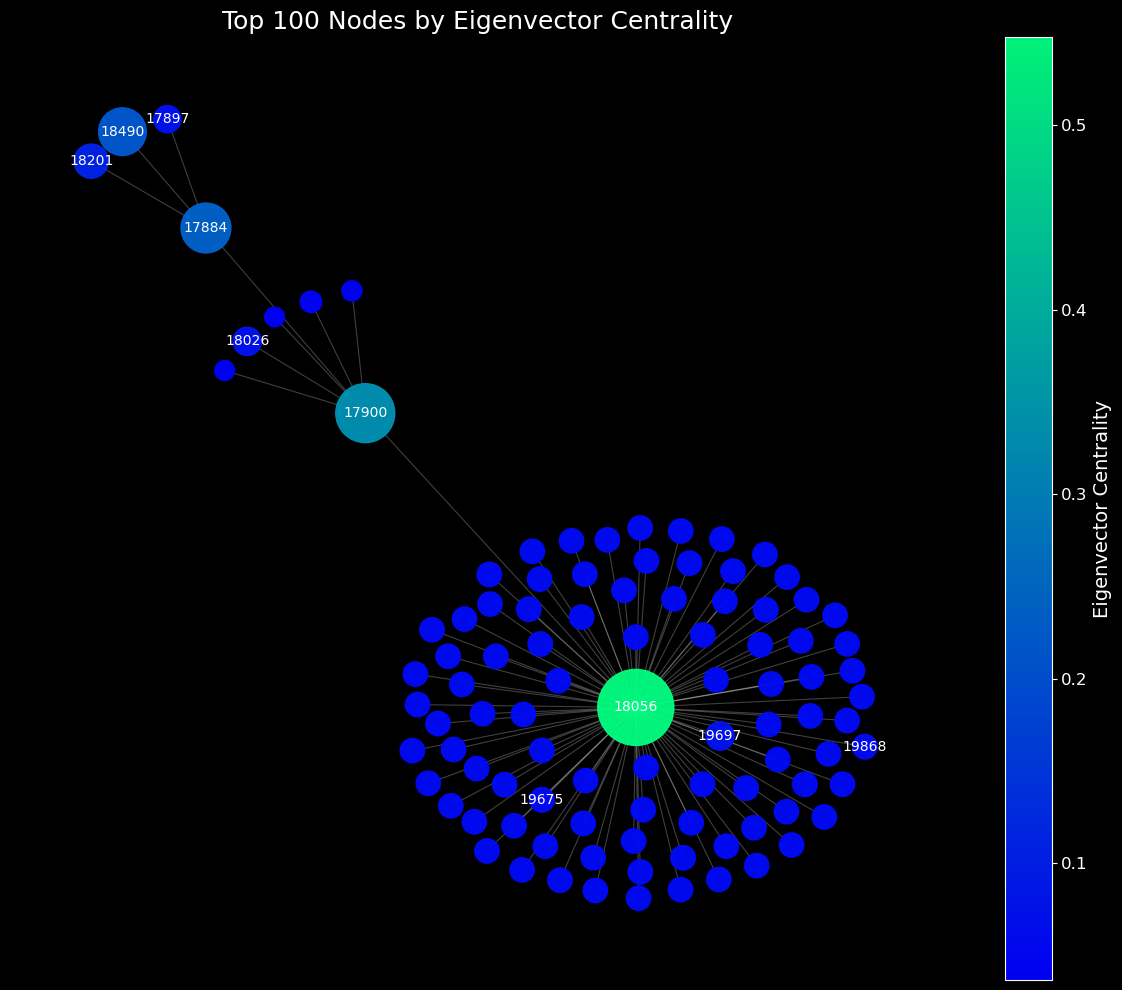

In [26]:
plt.style.use('dark_background')

top_node_ids = [node for node, _ in top_100]
G_sub = G.subgraph(top_node_ids).copy()

node_values = np.array([eigen_centrality[n] for n in G_sub.nodes()])
node_size = 3000 * (node_values / node_values.max())
node_color = node_values

top_10_labels = {node: str(node) for node, _ in top_100[:10]}

cmap = plt.cm.winter

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_sub, seed=42)

nodes = nx.draw_networkx_nodes(
    G_sub, pos,
    node_size=node_size,
    node_color=node_color,
    cmap=cmap,
    alpha=0.95,
    vmin=node_color.min(), 
    vmax=node_color.max()
)

nx.draw_networkx_edges(G_sub, pos, edge_color='white', alpha=0.25, width=0.8)

nx.draw_networkx_labels(G_sub, pos, labels=top_10_labels, font_size=10, font_color='white')

cbar = plt.colorbar(nodes)
cbar.set_label("Eigenvector Centrality", fontsize=14, color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), fontsize=12, color='white')

plt.title("Top 100 Nodes by Eigenvector Centrality", fontsize=18, color='white')
plt.axis('off')
plt.tight_layout()
plt.show()

# Multilayer Eigenvector Centrality

### Single-Layer Eigenvector Centrality
Given a graph $$( G = (V, E) )$$ with adjacency matrix $$( A )$$ the eigenvector centrality of a node $$( v_i )$$ is defined as:

$$
C_E(v_i) = \frac{1}{\lambda} \sum_{j \in V} A_{ij} \cdot C_E(v_j)
$$

### Multilayer Eigenvector Centrality
The **multilayer eigenvector centrality** of a node $$( v_i )$$ is defined as the weighted sum of its eigenvector centralities across all layers:

$$
C_E^{\text{multi}}(v_i) = \sum_{l=1}^{L} \alpha_l \cdot C_E^{(l)}(v_i)
$$

Where:
- $$( C_E^{(l)}(v_i) )\ is\ the\ eigenvector\ centrality\ of\ node\ ( v_i )\ in\ layer\ ( l )$$

In [27]:
graphs = {
    'campaign': G1,
    'friend': G2,
    'message': G3,
    'transaction': G4,
    'visit': G5
}

layer_eigen = {}
for name, g in graphs.items():
    try:
        layer_eigen[name] = nx.eigenvector_centrality(g.to_undirected(), max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        layer_eigen[name] = {}
        print(f"Warning: {name} layer did not converge.")

In [28]:
combined_eigen = defaultdict(float)
for centrality in layer_eigen.values():
    for node, value in centrality.items():
        combined_eigen[node] += value

top_100 = sorted(combined_eigen.items(), key=lambda x: x[1], reverse=True)[:100]

print("Top 100 Multilayer Eigenvector Centrality Nodes:")
for node, score in top_100:
    print(f"Node {node}: {score:.6f}")

Top 100 Multilayer Eigenvector Centrality Nodes:
Node 16453: 0.829303
Node 18056: 0.547783
Node 17900: 0.329483
Node 17884: 0.235514
Node 18490: 0.215023
Node 154274: 0.207675
Node 100248: 0.193365
Node 236410: 0.189043
Node 124836: 0.162910
Node 193674: 0.155662
Node 201168: 0.154759
Node 325009: 0.153503
Node 695178: 0.153455
Node 499756: 0.149366
Node 374805: 0.145530
Node 371461: 0.143872
Node 268072: 0.143381
Node 155957: 0.142650
Node 787633: 0.139448
Node 731519: 0.130772
Node 287150: 0.130541
Node 1221508: 0.129821
Node 628506: 0.126429
Node 862314: 0.126011
Node 16787: 0.125954
Node 153248: 0.125290
Node 216546: 0.125178
Node 663725: 0.123186
Node 980724: 0.122177
Node 445375: 0.122138
Node 744051: 0.121606
Node 337638: 0.119164
Node 440424: 0.118209
Node 175050: 0.117991
Node 316124: 0.117881
Node 579938: 0.117399
Node 481265: 0.116053
Node 749841: 0.115294
Node 16769: 0.115174
Node 787162: 0.114475
Node 1471008: 0.114075
Node 163080: 0.113957
Node 794230: 0.113951
Node 16328

In [29]:
pd.DataFrame(top_100, columns=["node", "eigenvector_centrality"]).to_csv("table/top100_multilayer_eigen.csv", index=False)

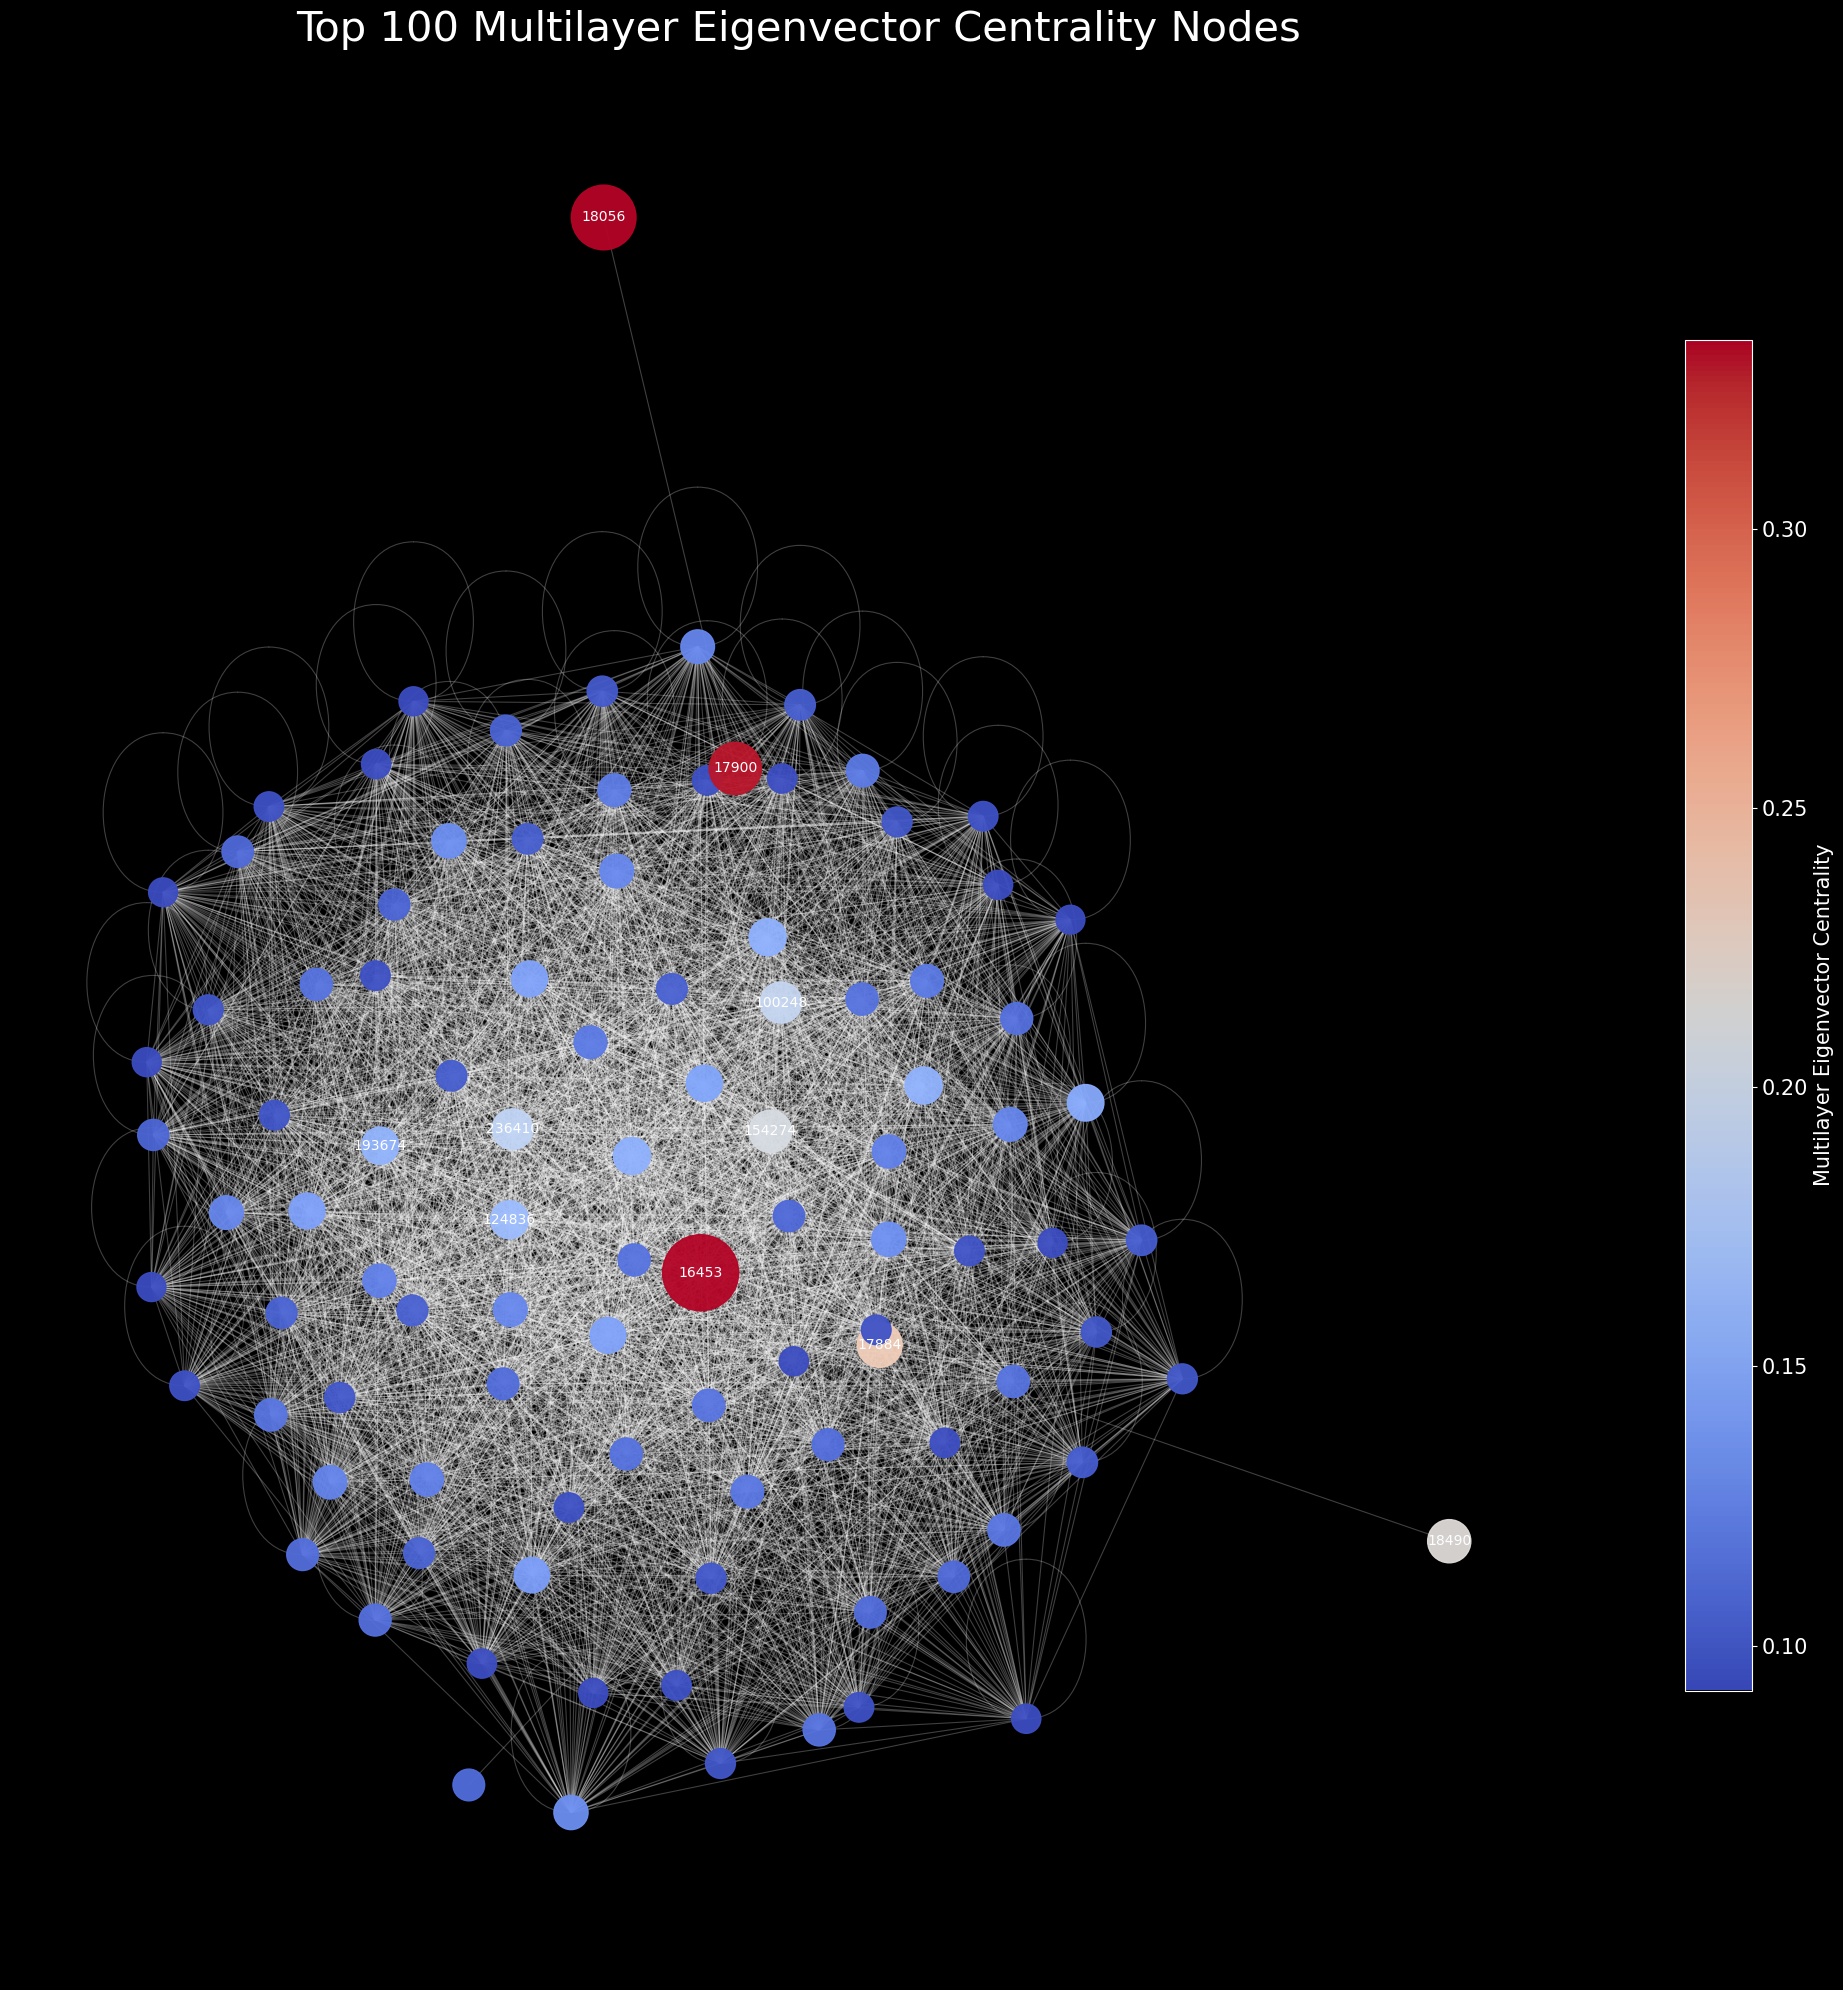

In [30]:
plt.style.use('dark_background')

G_all = nx.Graph()
for g in graphs.values():
    G_all.add_edges_from(g.edges())

top_nodes = [node for node, _ in top_100]
G_sub = G_all.subgraph(top_nodes).copy()

node_values = np.array([combined_eigen[n] for n in G_sub.nodes()])
log_values = np.log1p(node_values)
node_size = 3000 * (log_values / log_values.max())
node_color = node_values

top_10_labels = {node: str(node) for node, _ in top_100[:10] if node in G_sub.nodes()}

pos = nx.kamada_kawai_layout(G_sub)

plt.figure(figsize=(20, 20))

nodes = nx.draw_networkx_nodes(
    G_sub, pos,
    node_size=node_size,
    node_color=node_color,
    cmap=plt.cm.coolwarm,
    alpha=0.95,
    vmin=np.percentile(node_color, 5),
    vmax=np.percentile(node_color, 98)
)

nx.draw_networkx_edges(G_sub, pos, edge_color='white', alpha=0.25, width=0.8)

nx.draw_networkx_labels(G_sub, pos, labels=top_10_labels, font_size=10, font_color='white')

cbar = plt.colorbar(nodes, shrink=0.7)
cbar.set_label("Multilayer Eigenvector Centrality", fontsize=15, color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), fontsize=15, color='white')

plt.title("Top 100 Multilayer Eigenvector Centrality Nodes", fontsize=30, color='white')
plt.axis('off')
plt.tight_layout()
plt.show()